# Example 9

In [1]:
from CircuitCalculator.SimpleCircuit.Elements import Schematic, ComplexVoltageSource, Line, Ground, Impedance
from CircuitCalculator.SimpleCircuit.DiagramSolution import complex_network_dc_solution
from CircuitCalculator.SimpleCircuit.serializer import dump_json, load_json

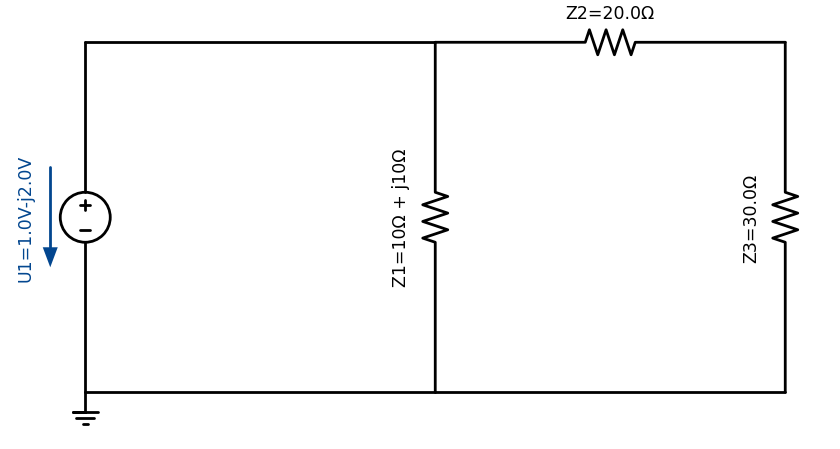

In [2]:
with Schematic() as schematic:
    schematic += (U1:=ComplexVoltageSource(V=1-2j, name='U1', reverse=True, precision=2).up())
    schematic += Line().right()
    schematic += (Z1:=Impedance(Z=10+10j, name='Z1', precision=2).down())
    schematic += Line().left()
    schematic += Ground()
    schematic += Impedance(Z=20, name='Z2').at(Z1.start).right()
    schematic += Impedance(Z=30, name='Z3').down()
    schematic += Line().left()
    dump_json('example_circuit_9.json', schematic)

In [3]:
schematic2 = load_json('example_circuit_9.json')
schemdraw_solution = complex_network_dc_solution(schematic2)
schematic2 += schemdraw_solution.draw_voltage('Z1')
schematic2 += schemdraw_solution.draw_current('Z1')
schematic2 += schemdraw_solution.draw_voltage('Z2')
schematic2 += schemdraw_solution.draw_voltage('Z3')
schematic2 += schemdraw_solution.draw_current('Z3', end=True)
schematic2 += schemdraw_solution.draw_current('U1', reverse=True)
schematic2.draw()

TypeError: schemdraw.segments.Segment.draw() argument after ** must be a mapping, not NoneType